#### Display the blue, green and red channel of the lena image simultaneously. Comment on the images displayed.

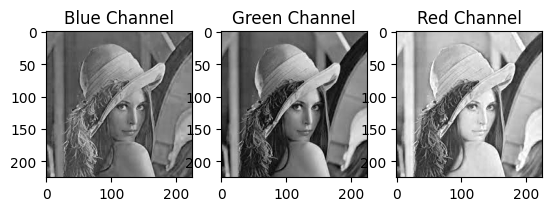

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

lena = cv.imread("images/lena.jfif")
b, g, r = cv.split(lena)

plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')

plt.show()

# These channels show that how different colors (b,g,r) contribute to the composition of the original image

#### Display the following images which originates from the file "images/dog.jfif".

In [24]:
dog = cv.imread("images/dog.jfif")
hsv = cv.cvtColor(dog, cv.COLOR_BGR2HSV) 
h, s, v = cv.split(hsv)

hsv_red = cv.merge((np.full_like(h, 0), s, v))
hsv_green = cv.merge((np.full_like(h, 60) , s, v))
hsv_blue = cv.merge((np.full_like(h, 120) , s, v))

dog_red = cv.cvtColor(hsv_red, cv.COLOR_HSV2BGR)
dog_green = cv.cvtColor(hsv_green, cv.COLOR_HSV2BGR)
dog_blue = cv.cvtColor(hsv_blue, cv.COLOR_HSV2BGR)

cv.imshow("red", dog_red)
cv.imshow("green", dog_green)
cv.imshow("blue", dog_blue)

cv.waitKey(0)
cv.destroyAllWindows()

#### 1.Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [2]:
width, height = 400, 300

color_noise_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
grayscale_noise_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

#### 2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:

In [3]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_grid = img.copy()
    height, width = img_grid.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            
            y1 = y + M
            x1 = x + N
            
            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                
            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_grid, (x, y), (x1, y1), line_color, 1)
                
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_grid, (x, y), (x1, y1), line_color, 1)
                
            else:
                cv.rectangle(img_grid, (x, y), (x1, y1), line_color, 1)
    return img_grid

In [5]:
lena_grid = crop_grid(lena, 2, 3, (0,0,255))
cv.imshow("grid", lena_grid)
cv.waitKey(0)
cv.destroyAllWindows()


#### 3. How would you change the brightness of a color image? Suggest two ways to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [11]:
# HSV approach, changing the value of V
hsv = cv.cvtColor(lena, cv.COLOR_BGR2HSV)  
h, s, v = cv.split(hsv)
v = np.uint8(v - 55)
hsv = cv.merge((h, s, v))
hsv_lena = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow("orignal", lena)
cv.imshow("dark", hsv_lena)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
# Using cv2.convertScaleAbs
bright_lena = cv.convertScaleAbs(lena, alpha = 1.0, beta = 50)
dark_lena = cv.convertScaleAbs(lena, alpha = 1.0, beta = -50)
cv.imshow("orignal", lena)
cv.imshow("bright", bright_lena)
cv.imshow("dark", dark_lena)
cv.waitKey(0)
cv.destroyAllWindows()